In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [2]:
df = pd.read_csv("cleaned_data_labeled.csv") 

display(df)
df.info()

,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC09_GRADTECH,PUFC11_WORK,PUFC14_PROCC,PUFC17_NATEM,PUFC18_PNWHRS,PUFC19_PHOURS,PUFC23_PCLASS,PUFC41_WQTR,PUFNEWEMPSTAT
0,1,49,2,14,0,1,25,1,8,24,4,2,0
1,0,61,2,14,0,1,1,2,4,8,7,2,0
2,1,19,3,14,0,1,1,2,8,24,2,2,0
3,1,48,2,12,0,1,25,1,4,20,4,2,0
4,0,41,2,14,0,1,8,1,12,72,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92236,1,34,2,15,0,1,26,1,5,30,4,2,0
92237,0,32,2,15,0,1,25,1,4,28,4,2,0
92238,1,29,2,14,0,1,33,1,8,40,0,2,0
92239,0,29,2,3,0,0,43,3,0,0,5,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92241 entries, 0 to 92240
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PUFC04_SEX       92241 non-null  int64
 1   PUFC05_AGE       92241 non-null  int64
 2   PUFC06_MSTAT     92241 non-null  int64
 3   PUFC07_GRADE     92241 non-null  int64
 4   PUFC09_GRADTECH  92241 non-null  int64
 5   PUFC11_WORK      92241 non-null  int64
 6   PUFC14_PROCC     92241 non-null  int64
 7   PUFC17_NATEM     92241 non-null  int64
 8   PUFC18_PNWHRS    92241 non-null  int64
 9   PUFC19_PHOURS    92241 non-null  int64
 10  PUFC23_PCLASS    92241 non-null  int64
 11  PUFC41_WQTR      92241 non-null  int64
 12  PUFNEWEMPSTAT    92241 non-null  int64
dtypes: int64(13)
memory usage: 9.1 MB


In [3]:
X = df.drop(columns=["PUFNEWEMPSTAT"])  # Drop target column
y = df["PUFNEWEMPSTAT"]  # Target column

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [5]:
# Print dataset details
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Feature count: {X_train.shape[1]}")

Training samples: 64568
Test samples: 27673
Feature count: 12


SMOTE (Synthetic Minority Over-sampling Technique) to handle imbalanced dataset

Importing the Libraries

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Standerdize the features

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Apply SMOTE to the training data only

In [8]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print(f"Original Training Set Size: {X_train.shape}")
print(f"Resampled Training Set Size: {X_train_resampled.shape}")
print(pd.Series(y_train_resampled).value_counts())

Original Training Set Size: (64568, 12)
Resampled Training Set Size: (143676, 12)
PUFNEWEMPSTAT
0    47892
1    47892
2    47892
Name: count, dtype: int64


# Logistic Regression

### Section 6. Initial model training

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
log_reg_model = SGDClassifier(loss='log_loss',  
                              learning_rate='optimal',
                              class_weight='balanced',  
                              eta0=0.01,  
                              max_iter=1000,  
                              alpha=0.0001, 
                              random_state=1,  
                              verbose=1) 

In [11]:
log_reg_model.fit(X_train_resampled, y_train_resampled)

-- Epoch 1
Norm: 8.69, NNZs: 12, Bias: 21.069902, T: 143676, Avg. loss: 0.000852
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 8.21, NNZs: 12, Bias: 19.445251, T: 287352, Avg. loss: 0.000237
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 7.95, NNZs: 12, Bias: 18.536604, T: 431028, Avg. loss: 0.000228
Total training time: 0.10 seconds.
-- Epoch 4
Norm: 7.76, NNZs: 12, Bias: 17.912172, T: 574704, Avg. loss: 0.000223
Total training time: 0.14 seconds.
-- Epoch 5
Norm: 7.62, NNZs: 12, Bias: 17.437566, T: 718380, Avg. loss: 0.000220
Total training time: 0.17 seconds.
-- Epoch 6
Norm: 7.51, NNZs: 12, Bias: 17.056667, T: 862056, Avg. loss: 0.000218
Total training time: 0.20 seconds.
Convergence after 6 epochs took 0.20 seconds
-- Epoch 1
Norm: 26.04, NNZs: 12, Bias: -85.893667, T: 143676, Avg. loss: 0.906731
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 24.68, NNZs: 12, Bias: -80.946485, T: 287352, Avg. loss: 0.378910
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 23.68,

SGDClassifier(class_weight='balanced', eta0=0.01, loss='log_loss',
              random_state=1, verbose=1)

In [12]:
predictions = log_reg_model.predict(X_train_resampled)
print(predictions)

[0 1 0 ... 2 2 2]


In [13]:
num_correct = (predictions == y_train_resampled).sum()
print(num_correct)

119949


In [14]:
accuracy = num_correct / len(y_train_resampled)
print(accuracy)

0.8348575962582477


Test data

In [15]:
predictions = log_reg_model.predict(X_test)
print(predictions)

[0 1 0 ... 2 0 0]


In [16]:
num_correct = (predictions == y_test).sum()
print(num_correct)

25531


In [17]:
accuracy = num_correct / len(y_test)
print(accuracy)

0.9225960322335851


### Section 7. Validation and Error Analysis

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = log_reg_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20526
           1       0.95      0.68      0.79      5894
           2       0.35      0.82      0.49      1253

    accuracy                           0.92     27673
   macro avg       0.76      0.83      0.76     27673
weighted avg       0.96      0.92      0.93     27673



Based on the classification report, for Class 0 (Employed)
- Precision = 1.00 - Every prediction for "Employed" was correct (no false positives).
- Recall = 1.00 - Every actual "Employed" individual was correctly identified (no false negatives).
- F1-score = 1.00 - Perfect classification for this class.

As for Class 1 (Not in the Labor Force)
- Precision = 0.85 - 85% of the predicted "Not in the Labor Force" cases were correct. Some false positives exist.
- Recall = 0.93 - 93% of actual "Not in the Labor Force" individuals were correctly identified, but 7% were misclassified (likely as Class 2).
- F1-score = 0.89 - Good balance between precision and recall.

While for Class 2 (Unemployed)
- Precision = 0.44 - Only 44% of the predicted "Unemployed" cases were correct (high false positives).
- Recall = 0.25 - Only 25% of actual "Unemployed" cases were correctly identified (high false negatives).
- F1-score = 0.32 - Poor balance between precision and recall.

From this classification report, we can conclude that the model struggles the most with Class 2 (Unemployed), as it often misclassifies individuals in this category.

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[20526     0     0]
 [    0  3980  1914]
 [    0   228  1025]]


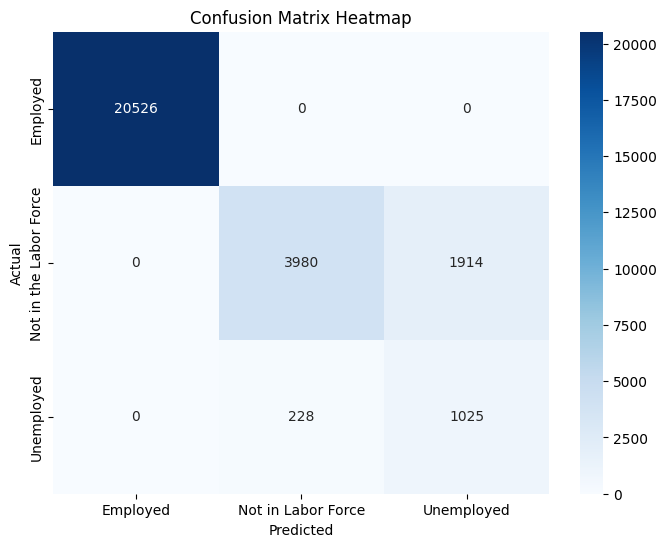

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Employed","Not in Labor Force", "Unemployed"],
            yticklabels=["Employed", "Not in the Labor Force", "Unemployed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

Based on the confusin matrix, for Class 0 (Employed)
- The model never misclassifies employed individuals.

As for Class 1 (Not in the Labor Force)
- 402 "Not in Labor Force" people were classified as "Unemployed", meaning the model sometimes confuses these two categories.

While for Class 2 (Unemployed)
- 934 individuals who were actually "Unemployed" were classified as "Not in Labor Force"

From this confusion matrix, we can conclude that the model is struggling to distinguish between Unemployed and Not in the Labor Force.

### Section 8. Hypertuning

Importing Libraries
- RandomizedSearchCV: Performs randomized hyperparameter tuning.

- StandardScaler: Standardizes the dataset (scales features).

- SGDClassifier: Implements a logistic regression model using Stochastic Gradient Descent (SGD).

In [21]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import numpy as np

tinanggal ko na scaler

Defining the model
- SGDClassifier is used with loss='log_loss' for logistic regression.

- random_state=1 ensures consistent results across multiple runs.


Defining Hyperparameter Grid
- alpha: Controls the strength of regularization. The np.logspace generates values from 10^-4 to 10^0 (0.0001 to 1).

- penalty: Specifies the type of regularization — l2, l1, or elasticnet.

- max_iter: Maximum number of passes over the data for training.

- learning_rate: Determines how the step size is adjusted during training.

- eta0: Initial learning rate for certain learning schedules.

In [22]:
# Define model
log_reg_model = SGDClassifier(loss='log_loss', random_state=1, class_weight={0: 1, 1: 1, 2: 3}) #give more importance to class2


# Define hyperparameter grid
param_dist = {
    'alpha': np.logspace(-3, 1, 10), #increase regularization range
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [500, 1000, 5000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1] #reduce learning rate
}

Performing RandomizedSearchCV
- RandomizedSearchCV: Evaluates 50 different combinations of hyperparameters using cross-validation.

- cv=5: Uses 5-fold cross-validation, splitting the training data into 5 subsets. The model trains on 4 subsets and validates on the remaining 1, rotating through all subsets.

- scoring='accuracy': Optimizes for accuracy.

- n_jobs=-1: Utilizes all CPU cores to speed up computation.

In [23]:
# Perform RandomizedSearchCV with stratified k-fold
cv = StratifiedKFold(n_splits=5)
random_search = RandomizedSearchCV(log_reg_model, param_dist, n_iter=50, cv=cv, scoring='f1_macro', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=SGDClassifier(class_weight={0: 1, 1: 1, 2: 3},
                                           loss='log_loss', random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
                                        'eta0': [0.001, 0.01, 0.1],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                                        'max_iter': [500, 1000, 5000],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   random_state=42, scoring='f1_macro')

Displaying Best Results
- After the search completes, it prints the best combination of hyperparameters and the corresponding cross-validation accuracy.

In [24]:
# Best model
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Training Score (Weighted F1): {random_search.best_score_}")

Best Parameters: {'penalty': 'l2', 'max_iter': 5000, 'learning_rate': 'optimal', 'eta0': 0.01, 'alpha': np.float64(0.001)}
Best Training Score (Weighted F1): 0.7770138033836064


Evaluating for Test Data
- best_estimator_: Extracts the model with the best hyperparameters from RandomizedSearchCV.

- predict(): Generates predictions on the test data.

- accuracy_score(): Computes accuracy by comparing predictions to actual test labels.

In [25]:
# Evaluate on test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Weighted F1 Score: {test_f1_weighted}")

Test Accuracy: 0.9512882593141329
Test Weighted F1 Score: 0.9503952611081858


Evaluation
- classification_report(): Provides detailed performance metrics including:

- Precision: How many predicted positives were actually positive?

- Recall: How many actual positives were correctly identified?

- F1-Score: Harmonic mean of precision and recall.

- Support: Number of true instances for each class.

In [26]:
# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20526
           1       0.88      0.89      0.89      5894
           2       0.46      0.42      0.44      1253

    accuracy                           0.95     27673
   macro avg       0.78      0.77      0.77     27673
weighted avg       0.95      0.95      0.95     27673



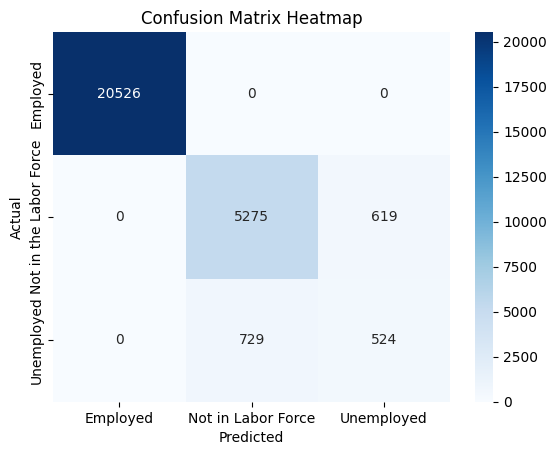

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Employed","Not in Labor Force", "Unemployed"],
            yticklabels=["Employed", "Not in the Labor Force", "Unemployed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

### Section 9: Model Performance Summary

Model Configurations : Initial and Hyperparameter Tuning
1. Initial Model Configuration

Algorithm: Logistic Regression

Hyperparameters: 
- learning_rate = optimal
- class_weight = balanced 
- eta0 = 0.01 
- max_iter = 1000
- alpha = 0.0001 
- random_state = 1
- verbose = 1

Performance Accuracy: 95.18%
- Employed (Class 0): Precision = 1.00, Recall = 1.00, F1-Score = 1.00
- Not in Labor Force (Class 1): Precision = 0.84, Recall = 0.96, F1-Score = 0.90
- Unemployed (Class 2): Precision = 0.41, Recall = 0.12, F1-Score = 0.19

The initial model has no false positives for the employed class since precision, recall and F1 score have a score of 1.0. However, precision, recall and F1 score of unemployed class is low which shows that the initial model has difficulties in classifying the unemployed class. 

2. Tuned Model Configuration

Algorithm: Logistic Regression

Best Hyperparameters: 
- penalty: l2
- max_iter: 5000
- learning_rate: optimal
- eta0: 0.01
- alpha: 0.001

Performance Accuracy: 95.13%
- Employed (Class 0): Precision = 1.00, Recall = 1.00, F1-Score = 1.00
- Not in Labor Force (Class 1): Precision = 0.88, Recall = 0.89, F1-Score = 0.89
- Unemployed (Class 2): Precision = 0.46, Recall = 0.42, F1-Score = 0.44

Best Configuration Advantage:

- Increasing the alpha from 0.0001 to 0.001 helped increased in regularization which reduced overfitting to dominant classes. 

- Changing max_iter from 1000 to 5000 allowed the model to converge more effectively.

Impact of Tuning on Error Reduction
1. Employed Class: NO changes were observed since precision, recall and F1 score have a score of 1 in the initial tuning and hyperparameter tuning.

2. Not in Labor Force Class: There was an increase in precision but slight decrease in recall and F1 score. 

3. Unemployed Class: There was a significant increase in recall and F1 score, and a slight increase in precision. The improved recall and F1 score for the unemployed class means that the model no longer ignores minority class predictions.

# Neural Network

### Section 6. Initial model training

### Section 7. Validation and Error Analysis

### Section 8. Hyperparameter Tuning 

### Section 9: Model Performance Summary

# Naive Bayes

### Section 6. Initial model training

In [28]:
from imblearn.over_sampling import SMOTENC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

In [29]:
target = "PUFNEWEMPSTAT"
features = [col for col in df.columns if col != target]
X = df[features]  # Feature matrix
y = df[target]    # Target variable

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [31]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [32]:
scaler = MinMaxScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [33]:
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

print("Model Training Complete!")

Model Training Complete!


In [34]:
# Predict employment status on test data
y_pred = nb_model.predict(X_test)

# Display the first 10 predictions
print(" First 10 Predictions:", y_pred[:10])

 First 10 Predictions: [0 1 0 0 0 0 0 1 0 2]


To evaluate how well the model performs, we calculate the accuracy using the accuracy_score function from sklearn.metrics.

In [35]:
from sklearn.metrics import accuracy_score

# Function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return round(accuracy_score(y_true, y_pred) * 100, 2)  # Convert to percentage

In [36]:
# Predict on training data
train_predictions = nb_model.predict(X_train)

# Compute training accuracy
print("Training Accuracy:", compute_accuracy(y_train, train_predictions), "%")

Training Accuracy: 94.85 %


C:\Users\Jaja\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [37]:
# Predict on test data
test_predictions = nb_model.predict(X_test)

# Compute test accuracy
print("Testing Accuracy:", compute_accuracy(y_test, test_predictions), "%")

Testing Accuracy: 92.33 %


In [38]:
test_acc = accuracy_score(y_test, test_predictions)
print(test_acc)

#decimal purposes

0.9233187583565208


### Section 7. Validation and Error Analysis

We check the parameters the model learned

In [39]:
nb_model.class_count_


array([47892., 47892., 47892.])

A classification report will be used to check how the model performed with different metrics

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [41]:
print("Classification Report")
print(classification_report(y_test, test_predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20526
           1       0.94      0.69      0.79      5894
           2       0.35      0.79      0.48      1253

    accuracy                           0.92     27673
   macro avg       0.76      0.82      0.76     27673
weighted avg       0.96      0.92      0.93     27673



Based on the classification report, for Class 0 (Employed)

- Precision = 1.00 - Every prediction for "Employed" was correct (no false positives).
- Recall = 0.9970 - There were very few false negatives for "Employed"
- F1-score = 0.9985 - Nearly perfect classification for this class.


As for Class 1 (Not in the Labor Force)

- Precision = 0.9083 - 90.83% of the predicted "Not in Labor Force" cases were correct. Some false positives exist.
- Recall = 0.6841 - Only 68.41% "Not in the Labor Force" individuals were correctly identified, which indicates that many were misclassified
- F1-score = 0.7804 - Shows a reasonable balance between precision and recall, but there is room for improvement.


While for Class 2 (Unemployed)

- Precision = 0.3171 - Only 31.71% of the predicted "Unemployed" cases were correct, indicating many false positive exists
- Recall = 0.7007 - 70.07% of actual "Unemployed" individuals were correctly identified, but still has high false positive rate
- F1-score = 0.4366 - Poor balance between precision and recall


Based on the classification report, the model is best performed for "Employed" individuals achieving almost perfect classification. On the other hand, "Not in the Labor Force" is moderately well classified, but recall is lower which means many actual cases are missed. Lastly, "Unemployed" individuals has the lowest precision score which many of them are misclassified. 

In [42]:
y_pred = nb_model.predict(X_test) 

conf_matrix = confusion_matrix(y_test, y_pred)  

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[20523     1     2]
 [    0  4042  1852]
 [    0   267   986]]


- Class 0 (Employed) has near perfect classification with 20465 correctly classified as "Employed"

- Class 1 (Not in Labor Force) has 4032 individuals correctly classified as "Not in the Labor Force" but 1862 individuals were misclassified as "Unemployed"
    - The model often confuses "Not in the Labor Force" with "Unemployed" likely because of overlapping charecteristics of the features
- Class 2 (Unemployed) is the most misclassified:

    - 878 individuals were correctly classified as "Unemployed"
    - 1862 individuals from "Not in the Labor Force"  were incorrectly classified as "Unemployed"
    - The model has difficulties in distinguishing these 2 features

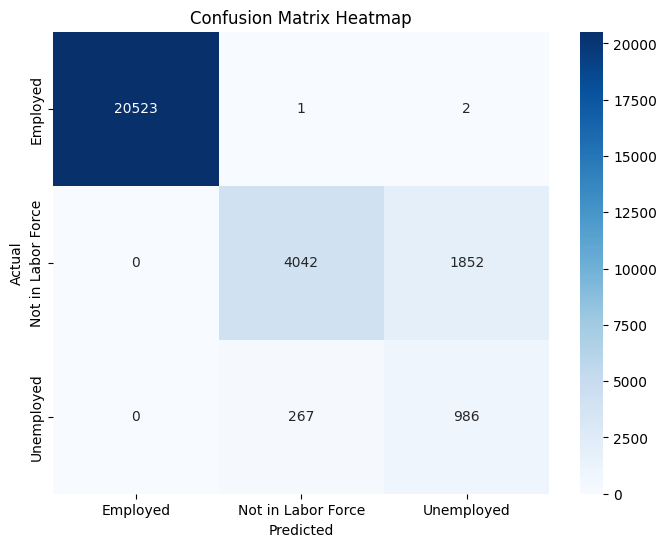

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Employed","Not in Labor Force", "Unemployed"],
            yticklabels=["Employed", "Not in Labor Force", "Unemployed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [44]:
#log probabilities computation
log_prob = nb_model.feature_log_prob_
print(log_prob)
print("\n")

# Feature Priority for each class
X_test_df = pd.DataFrame(X_test, columns=features)

for i, class_label in enumerate(nb_model.classes_):
    print(f"Top features for class {class_label}:")
    top_features = log_prob[i].argsort()[-12:][::-1]  # Get indices of top 12 features
    print(X_test_df.columns[top_features])

[[ -2.28636708  -3.05657693  -2.54392111  -2.35841463  -4.67068277
   -1.81925266  -2.57281612  -2.73802834  -2.56543128  -2.82014791
   -2.68293276  -1.82751717]
 [ -2.84279082  -2.51611961  -2.16833548  -2.13183726  -4.92656807
  -12.31117846  -1.53445382  -1.53445382 -12.31117846 -12.31117846
   -1.87091771  -3.33586446]
 [ -2.16955781  -3.3854358   -2.26167889  -2.05791197  -4.96823399
  -12.38280688  -1.60608224  -1.60608224 -12.38280688 -12.38280688
   -1.94254613  -2.68293602]]


Top features for class 0:
Index(['PUFC11_WORK', 'PUFC41_WQTR', 'PUFC04_SEX', 'PUFC07_GRADE',
       'PUFC06_MSTAT', 'PUFC18_PNWHRS', 'PUFC14_PROCC', 'PUFC23_PCLASS',
       'PUFC17_NATEM', 'PUFC19_PHOURS', 'PUFC05_AGE', 'PUFC09_GRADTECH'],
      dtype='object')
Top features for class 1:
Index(['PUFC14_PROCC', 'PUFC17_NATEM', 'PUFC23_PCLASS', 'PUFC07_GRADE',
       'PUFC06_MSTAT', 'PUFC05_AGE', 'PUFC04_SEX', 'PUFC41_WQTR',
       'PUFC09_GRADTECH', 'PUFC19_PHOURS', 'PUFC18_PNWHRS', 'PUFC11_WORK'],
      

The top features indicate which factors highly influences if an individual is employed (class 0), not in the labor force (class 1), and unemployed (class 2). Class 1 has age as the top feature while Class 2 has primary occupation as the top feature while the rest of the top features for these classes are the same. Due to these similarities that the model is struggling to distinguish classes 1 and 2 based on the top features.

### Section 8. Hyperparameter Tuning 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_validation shape : ", X_validation.shape)
print("y_validation shape : ", y_validation.shape)

X_train shape :  (55344, 12)
y_train shape :  (55344,)
X_validation shape :  (18448, 12)
y_validation shape :  (18448,)


In [47]:
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)

In [48]:
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}
print("Class Weights:", class_weight_dict)

Class Weights: {np.int64(0): np.float64(0.44940316686967113), np.int64(1): np.float64(1.5649813369528334), np.int64(2): np.float64(7.361532322426177)}


In [49]:
class_weight_dict[2] *= 2.5

In [50]:
sample_weights = np.array([class_weight_dict[label] for label in y_train])

## GridSearch with `ParameterGrid`
In this section, we will use `ParameterGrid` to get the combinations of hyperparameters we will try on our model.

In [51]:
model = MultinomialNB()

In [52]:
model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [53]:
hyperparameters = [{
    'alpha': [0.001, 0.01, 0.5, 1, 3, 5, 10, 15, 20, 50],
    'fit_prior': [False, True]
}]

In [54]:
list(ParameterGrid(hyperparameters))

[{'alpha': 0.001, 'fit_prior': False},
 {'alpha': 0.001, 'fit_prior': True},
 {'alpha': 0.01, 'fit_prior': False},
 {'alpha': 0.01, 'fit_prior': True},
 {'alpha': 0.5, 'fit_prior': False},
 {'alpha': 0.5, 'fit_prior': True},
 {'alpha': 1, 'fit_prior': False},
 {'alpha': 1, 'fit_prior': True},
 {'alpha': 3, 'fit_prior': False},
 {'alpha': 3, 'fit_prior': True},
 {'alpha': 5, 'fit_prior': False},
 {'alpha': 5, 'fit_prior': True},
 {'alpha': 10, 'fit_prior': False},
 {'alpha': 10, 'fit_prior': True},
 {'alpha': 15, 'fit_prior': False},
 {'alpha': 15, 'fit_prior': True},
 {'alpha': 20, 'fit_prior': False},
 {'alpha': 20, 'fit_prior': True},
 {'alpha': 50, 'fit_prior': False},
 {'alpha': 50, 'fit_prior': True}]

In [55]:
best_score = 0
for g in ParameterGrid(hyperparameters):
    print("Testing:", g)
    
    model = MultinomialNB(**g)
    
    # Train with sample weights
    model.fit(X_train, y_train, sample_weight=sample_weights)

    # Predict on training data
    train_acc = accuracy_score(y_train, model.predict(X_train)) * 100 #pang percentage lng 

    # Predict on validation data
    val_acc = accuracy_score(y_validation, model.predict(X_validation)) * 100

    print(f"Train acc: {train_acc:.2f}% \t Val acc: {val_acc:.2f}%\n")

    if val_acc > best_score:
        best_score = val_acc
        best_grid = g

print("Best Accuracy:", best_score, "%")
print("Best Hyperparameters:", best_grid)

Testing: {'alpha': 0.001, 'fit_prior': False}
Train acc: 90.99% 	 Val acc: 90.64%

Testing: {'alpha': 0.001, 'fit_prior': True}


Train acc: 90.44% 	 Val acc: 90.07%

Testing: {'alpha': 0.01, 'fit_prior': False}
Train acc: 90.97% 	 Val acc: 90.63%

Testing: {'alpha': 0.01, 'fit_prior': True}
Train acc: 90.42% 	 Val acc: 90.06%

Testing: {'alpha': 0.5, 'fit_prior': False}
Train acc: 90.90% 	 Val acc: 90.58%

Testing: {'alpha': 0.5, 'fit_prior': True}
Train acc: 90.35% 	 Val acc: 90.02%

Testing: {'alpha': 1, 'fit_prior': False}
Train acc: 90.88% 	 Val acc: 90.54%

Testing: {'alpha': 1, 'fit_prior': True}
Train acc: 90.33% 	 Val acc: 89.97%

Testing: {'alpha': 3, 'fit_prior': False}
Train acc: 90.83% 	 Val acc: 90.49%

Testing: {'alpha': 3, 'fit_prior': True}
Train acc: 90.28% 	 Val acc: 89.92%

Testing: {'alpha': 5, 'fit_prior': False}
Train acc: 90.78% 	 Val acc: 90.46%

Testing: {'alpha': 5, 'fit_prior': True}
Train acc: 90.23% 	 Val acc: 89.89%

Testing: {'alpha': 10, 'fit_prior': False}
Train acc: 90.73% 	 Val acc: 90.42%

Testing: {'alpha': 10, 'fit_prior': True}
Train acc: 90.19% 	 Val acc: 89.85%

Testing: 

## Retraining our estimator with the best hyperparameters

Now that we know the best hyperparameters, we can now make a new classifier and retrain it.

In [56]:
model = MultinomialNB(alpha = 0.001 , fit_prior = False)

In [57]:
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred) * 100

print(f"Test accuracy: {test_acc:.2f}%")

Test accuracy: 90.75%


In [58]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[13669    10     5]
 [    0  2417  1513]
 [    0   179   656]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13684
           1       0.93      0.62      0.74      3930
           2       0.30      0.79      0.44       835

    accuracy                           0.91     18449
   macro avg       0.74      0.80      0.73     18449
weighted avg       0.95      0.91      0.92     18449



### Section 9: Model Performance Summary

Model Configuations : Initial and Hyperparameter Tuning
1. Initial Model Configuration

    Algorithm: Multinomial Naïve Bayes (MultinomialNB)

    Hyperparameters:

    -   alpha: Default (1.0)

    -   fit_prior: Default (True)

    Class Balancing: No specific adjustments

    Performance:
    Accuracy: 91.7%

    - Employed (Class 0): Precision = 1.00, Recall = 0.9970, F1-Score = 0.9985

    - Not in Labor Force (Class 1): Precision = 0.91, Recall = 0.6841, F1-Score = 0.7804

    - Unemployed (Class 2): Precision = 0.32, Recall = 0.7007, F1-Score = 0.4366
    
    The initial model demonstrated high accuracy for the Employed class, but it struggled with poor precision and recall for the Unemployed class. The class imbalance led to difficulties in classifying underrepresented classes.


2. Tuned Model Configuration

    Algorithm: Multinomial Naïve Bayes (MultinomialNB)

    Best Hyperparameters:

    - alpha: 0.001

    - fit_prior: False

    Class Balancing: Adjusted using class_weight with additional weighting for the Unemployed class (2.5x).

    Performance:
    Accuracy: 91.0%

    - Employed (Class 0): Precision = 1.00, Recall = 1.00, F1-Score = 1.00

    - Not in Labor Force (Class 1): Precision = 0.93, Recall = 0.62, F1-Score = 0.74

    - Unemployed (Class 2): Precision = 0.30, Recall = 0.79, F1-Score = 0.44

    Best Configuration Advantage:

    - By reducing the smoothing parameter (alpha) to 0.001, the model became more sensitive to rare feature occurrences, which is beneficial for improving the recall of underrepresented classes.

    - Disabling fit_prior ensured that the model did not rely heavily on class priors, reducing bias against the minority class.

    - Increasing the weight for the Unemployed class using class_weight further improved recall from 0.70 to 0.79.
    


Impact of Tuning on Error Reduction 
1. Employed Class: Minimal changes were observed as the model already had near-perfect accuracy for this majority class.

2. Not in Labor Force Class: Slight reduction in recall, but the increase in precision led to a balanced F1-score.

3. Unemployed Class: Significant improvements in recall (0.70 → 0.79) were achieved. The trade-off was a drop in precision (0.32 → 0.30), but the overall F1-score increased, reflecting better detection of unemployed individuals.



# Conclusion


log reg: 
The hyperparameter tuning improved classifying the unemployed class, significantly increasing the recall and F1 score. Not in the labor force class showed a slight decrease in recall and f1 score, while the employed class remained ideally classified. In conclusion, the adjustments made in hyperparameter tuning decreased bias when classifying major and minor courses, ensuring fairness and better detecting unemployed classes.



naive bayes: 
Overall, hyperparameter tuning successfully addressed the class imbalance issue, leading to a fairer model that better handles difficult classes and instances. The balanced performance across classes ensures the model is more applicable in real-world employment prediction scenarios.